## Digit Recognition using Machine Learning

> - MNIST dataset (https://s3.amazonaws.com/img-datasets/mnist.npz)
 - Each image is a hand-written digit represented by 28 x 28 = 784 pixels (input features) 
 - Each pixel is encoded by a grayscale value (between 0 and 255)
 - Images are labeled 0-9 based on the digits they represent
 - Dataset contains 60,000 examples for training and 10,000 examples for testing 


> We shall use the following classifiers:
> - Scikit-Learn classifiers (https://scikit-learn.org/stable/)
  - Naive Bayes
  - Decision Tree
  - Random Forest
 

> - TensorFlow classifiers (https://www.tensorflow.org/)
  - Single Layered Artificial Neural Network
  - Convolution Neural Network

#### Import packages
We shall use the following useful packages

In [1]:
import numpy as np # for computation
import matplotlib.pyplot as plt # for plotting
import pandas as pd # for data handling
import time # for timing

from keras.datasets import mnist # to load data

# for scikit-learn models
from sklearn.naive_bayes import MultinomialNB # naive bayes
from sklearn.tree import DecisionTreeClassifier # decision tree
from sklearn.ensemble import RandomForestClassifier # random forest

from sklearn.metrics import accuracy_score, confusion_matrix # for accuracy

# for neural networks
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adadelta
from tensorflow.keras.utils import plot_model # to plot models

from sklearn.tree import export_graphviz
from subprocess import call
from IPython.display import Image, display

import PIL 


Using TensorFlow backend.


### Load MNIST data

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


### Examine data set

In [3]:
h, w = x_train.shape[1:] # height and width of image
nFeatures = h*w # number of input features
nTrain, nTest = len(y_train), len(y_test) # number of examples
classes = np.unique(y_train) # unique classes
nClasses = len(classes)
print("Number of labeled examples for:")
print("\tTraining: %d" %nTrain)
print("\tTesting: %d" %nTest)
print("Number of classes %d: \n\t%s"
     %(nClasses, ', '.join([str(d) for d in classes])))
print("Image: height = %d, width = %d" %(h, w))
print("Number of input features = %d x %d = %d" %(h, w, nFeatures))

Number of labeled examples for:
	Training: 60000
	Testing: 10000
Number of classes 10: 
	0, 1, 2, 3, 4, 5, 6, 7, 8, 9
Image: height = 28, width = 28
Number of input features = 28 x 28 = 784


### Display images of digits

In [0]:
# function to display digits
def displayDigits(images, labels, nCols):
    """Displays images with labels (nCols per row)
    - images: (28x28) grayscale values
    - labels: list of digits represented by images"""
    nRows = np.ceil(len(labels)/nCols).astype('int') # number of rows
    plt.figure(figsize=(2*nCols,2*nRows)) # figure size
    for i in range(len(labels)):
        plt.subplot(nRows,nCols,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], interpolation='nearest', cmap='gray_r')
        plt.xlabel(str(labels[i]), fontsize=14)
    plt.show()
    return

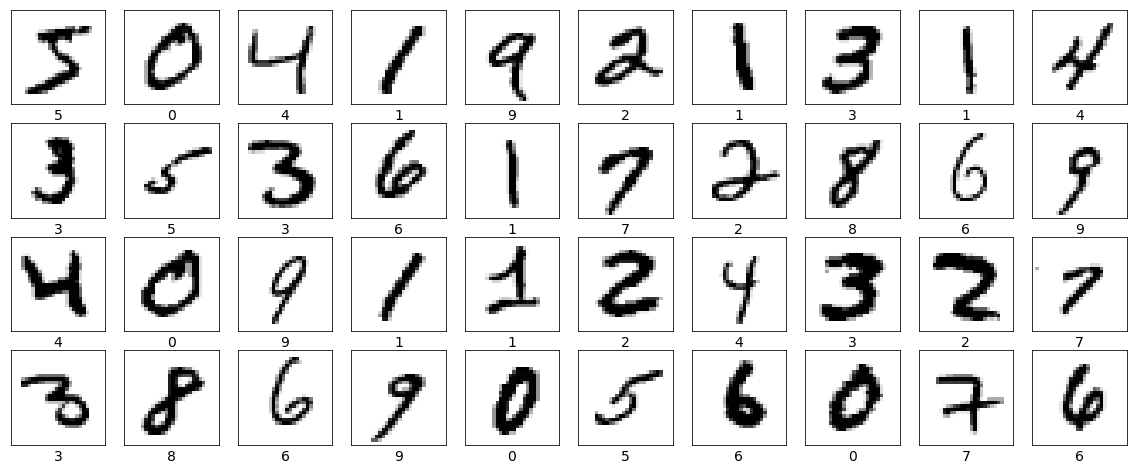

In [5]:
# display the first k digits from the training set
k = 40
images, labels = x_train[:k], y_train[:k]
displayDigits(images, labels, 10)

In [6]:
k = 0
print("Matrix of 28 x 28 grayscale values representing training image %d" %k)
pd.DataFrame(x_train[k])

Matrix of 28 x 28 grayscale values representing training image 0


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0


### Train and test machine learning models

In [0]:
# Reshape input data for sklearn models
X, Xt = x_train.reshape(nTrain, nFeatures), x_test.reshape(nTest, nFeatures)

result = [] # to record results

#### Naive Bayes
Use scikitlearn classifier MultinomialNB(): 
- http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

- The conditional probability distributions of feature values given digit is learnt from training data.
- Bayesian inference is used to compute the posterior probability of digits given feature values.
- The most likely digit is predicted as the output class.
- Relatively low classification accuracy with Naive Bayes model

In [8]:
model = MultinomialNB() # create naive Bayes model 
print(model) # display model parameters
st = time.time()
model.fit(X, y_train) # train model
t = time.time() - st
print("Time to train model = %4.2f seconds" %t)
predicted = model.predict(Xt) # predict test labels with trained model
acc = accuracy_score(y_test, predicted) # accuracy with test data
print("\nAccuracy with test data = %4.2f%%\n" %(acc*100))
result.append(['Naive Bayes', acc, t])
print("Confusion matrix:\n")
pd.DataFrame(confusion_matrix(y_test, predicted)) # display confusion matrix

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
Time to train model = 0.40 seconds

Accuracy with test data = 83.65%

Confusion matrix:



,0,1,2,3,4,5,6,7,8,9
0,912,0,2,6,1,8,14,1,36,0
1,0,1061,5,9,0,2,6,0,51,1
2,15,11,858,24,10,3,33,11,66,1
3,4,11,34,851,1,21,7,14,40,27
4,2,2,6,0,732,0,25,1,38,176
5,23,11,6,107,18,590,17,6,78,36
6,17,13,17,1,7,25,860,0,18,0
7,1,21,11,5,19,0,1,861,40,69
8,6,26,13,54,14,27,8,9,777,40
9,6,7,3,10,66,10,0,17,27,863


#### Decision Tree
Use scikitlearn classifier:
- http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
- Constructs a tree that sortsexamples at the leaf nodes
- Classification accuracy slightly higher with decision tree classifier.

In [9]:
model = DecisionTreeClassifier() # create decision tree model 
print(model) # display model parameters
st = time.time()
model.fit(X, y_train) # train model
t = time.time() - st
print("Time to train model = %4.2f seconds" %t)
predicted = model.predict(Xt) # predict test labels with trained model
acc = accuracy_score(y_test, predicted) # accuracy with test data
print("\nAccuracy with test data = %4.2f%%\n" %(acc*100))
result.append(['Decision Tree', acc, t])
print("Confusion matrix:\n")
pd.DataFrame(confusion_matrix(y_test, predicted)) # display confusion matrix

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
Time to train model = 26.38 seconds

Accuracy with test data = 87.90%

Confusion matrix:



,0,1,2,3,4,5,6,7,8,9
0,916,0,4,6,8,12,8,4,13,9
1,0,1084,12,6,3,4,7,2,14,3
2,9,10,892,31,14,11,8,26,23,8
3,8,4,29,853,6,45,9,8,25,23
4,7,1,9,6,860,11,17,10,23,38
5,14,5,5,39,7,756,22,6,21,17
6,14,5,10,5,20,23,851,1,26,3
7,3,15,21,20,3,6,2,929,7,22
8,8,5,33,32,21,31,14,9,792,29
9,18,4,7,22,41,12,6,18,24,857


Let's see what a tree looks like.
Run the cell below and open the PNG file *tree.png*

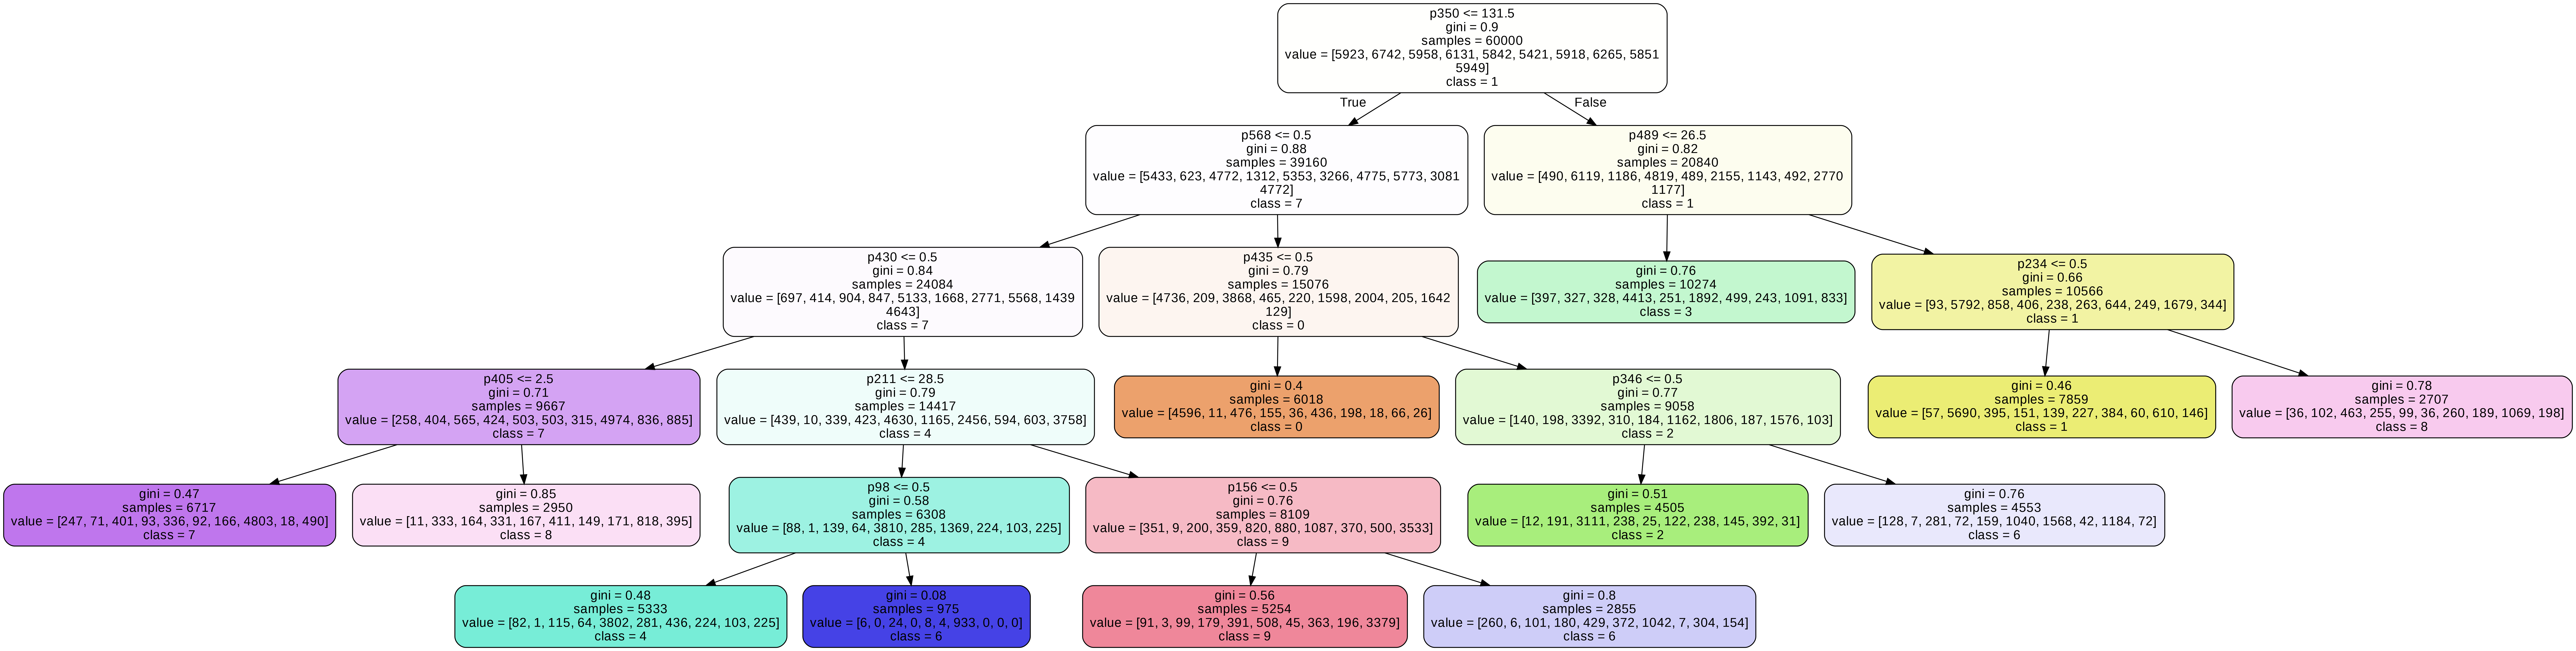

In [10]:
estimator = DecisionTreeClassifier(max_leaf_nodes=12)
estimator.fit(X, y_train) # train model
export_graphviz(estimator , out_file='tree.dot', 
                feature_names = ['p'+str(i) for i in range(nFeatures)],
                class_names = [str(i) for i in range(nClasses)],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=300'])

Image(filename = 'tree.png', width=10, height=10)


#### Random Forest
- http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
- An ensemble of trees may do significantly better than a single tree

In [11]:
model = RandomForestClassifier(n_estimators=50) # create random forest model 
print(model) # display model parameters
st = time.time()
model.fit(X, y_train) # train model
t = time.time() - st
print("Time to train model = %4.2f seconds" %t)
predicted = model.predict(Xt) # predict test labels with trained model
acc = accuracy_score(y_test, predicted) # accuracy with test data
print("\nAccuracy with test data = %4.2f%%\n" %(acc*100))
result.append(['Random Forest', acc, t])
print("Confusion matrix:\n")
pd.DataFrame(confusion_matrix(y_test, predicted)) # display confusion matrix

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Time to train model = 25.89 seconds

Accuracy with test data = 96.80%

Confusion matrix:



,0,1,2,3,4,5,6,7,8,9
0,972,0,1,0,0,2,2,1,2,0
1,0,1121,3,3,0,1,3,0,3,1
2,6,0,1002,5,2,1,3,8,5,0
3,2,0,12,965,0,7,0,9,9,6
4,1,0,2,0,954,0,4,0,3,18
5,4,1,0,15,2,855,7,1,5,2
6,8,3,0,0,3,3,937,0,4,0
7,1,3,18,3,1,0,0,988,2,12
8,3,0,6,12,4,5,4,4,928,8
9,6,4,1,11,13,3,1,5,7,958


#### Artificial Neural Network (single layered)
- Weights associated with the connections in a network are iteratively trained

In [0]:
# function to plot training and validation accuracy
def plotHistory(modelName, history, start=0):
    """Plots training and validation accuracy"""
    plt.plot(history.history['acc'][start:])
    plt.plot(history.history['val_acc'][start:])
    plt.title(modelName+' accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
None


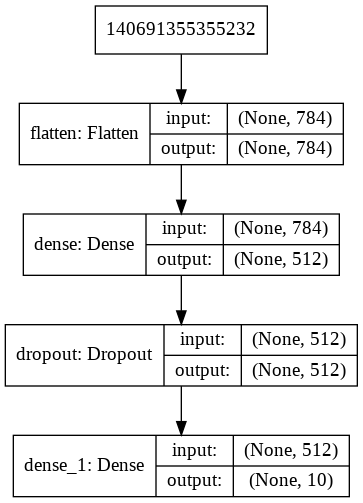


Training artificial neural network:

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 5s 109us/sample - loss: 0.2423 - acc: 0.9279 - val_loss: 0.1199 - val_acc: 0.9647
Epoch 2/10
50000/50000 [==============================] - 5s 98us/sample - loss: 0.1048 - acc: 0.9686 - val_loss: 0.0889 - val_acc: 0.9740
Epoch 3/10
50000/50000 [==============================] - 5s 97us/sample - loss: 0.0715 - acc: 0.9779 - val_loss: 0.0791 - val_acc: 0.9768
Epoch 4/10
50000/50000 [==============================] - 5s 97us/sample - loss: 0.0569 - acc: 0.9823 - val_loss: 0.0824 - val_acc: 0.9763
Epoch 5/10
50000/50000 [==============================] - 5s 97us/sample - loss: 0.0444 - acc: 0.9851 - val_loss: 0.0767 - val_acc: 0.9779
Epoch 6/10
50000/50000 [==============================] - 5s 98us/sample - loss: 0.0362 - acc: 0.9885 - val_loss: 0.0707 - val_acc: 0.9798
Epoch 7/10
50000/50000 [==============================] - 5s 97us/sample - lo

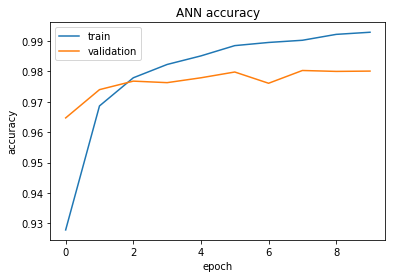

Time to train model = 50.37 seconds

Accuracy with test data = 97.96%

Confusion matrix:



,0,1,2,3,4,5,6,7,8,9
0,959,1,5,0,2,1,8,1,1,2
1,0,1122,3,1,0,0,3,0,6,0
2,0,1,1008,2,3,0,3,7,8,0
3,1,0,0,988,0,1,0,5,8,7
4,0,0,5,0,964,2,4,0,1,6
5,1,0,0,8,1,868,5,1,5,3
6,1,3,0,1,4,1,947,0,1,0
7,0,3,7,1,1,0,0,1005,3,8
8,0,0,4,2,3,3,2,3,953,4
9,1,3,0,5,10,2,0,3,3,982


In [13]:
# Define single-layered tensorflow neural network (ANN)
def ann():
    """Returns trained single layered network"""
    model = Sequential([
        Flatten(input_shape=(nFeatures,)),
        Dense(512, activation='relu'),
        Dropout(0.2),
        Dense(nClasses, activation='softmax')])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model
 
model = ann() # create model
print(model.summary()) # display model summary
plot_model(model, to_file='ann.png', show_shapes=True, show_layer_names=True)
Image('ann.png')
display(Image('ann.png'))
print("\nTraining artificial neural network:\n")
st = time.time()
history = model.fit(X/255, y_train, validation_split=1/6, epochs=10) # train 
t = time.time() - st
plotHistory("ANN", history, start=0)
print("Time to train model = %4.2f seconds" %t)
predicted = model.predict(Xt/255).argmax(axis=1) # predict test labels 
acc = accuracy_score(y_test, predicted) # accuracy with test data
print("\nAccuracy with test data = %4.2f%%\n" %(acc*100))
result.append(['ANN', acc, t])
print("Confusion matrix:\n")
pd.DataFrame(confusion_matrix(y_test, predicted)) # display confusion matrix

#### Convolution Neural Network
- Aritificial neural network that takes into account neighboring pixels and extracts abstract features through successive layers. 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               262400    
__________

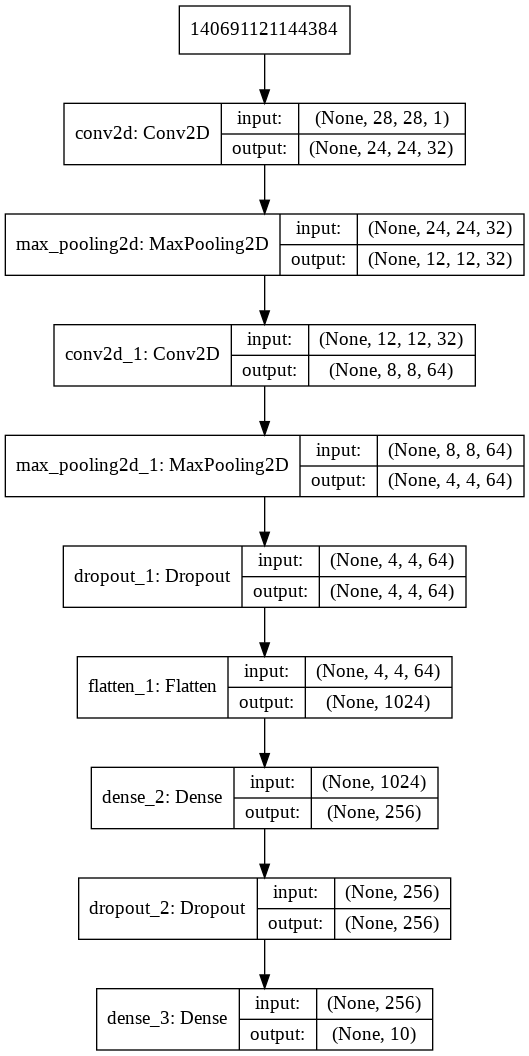

Train on 50000 samples, validate on 10000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
50000/50000 [==============================] - 4s 82us/sample - loss: 0.2431 - acc: 0.9234 - val_loss: 0.0588 - val_acc: 0.9824
Epoch 2/10
50000/50000 [==============================] - 2s 47us/sample - loss: 0.0670 - acc: 0.9797 - val_loss: 0.0412 - val_acc: 0.9876
Epoch 3/10
50000/50000 [==============================] - 2s 47us/sample - loss: 0.0473 - acc: 0.9853 - val_loss: 0.0347 - val_acc: 0.9889
Epoch 4/10
50000/50000 [==============================] - 2s 47us/sample - loss: 0.0374 - acc: 0.9885 - val_loss: 0.0344 - val_acc: 0.9894
Epoch 5/10
50000/50000 [==============================] - 2s 47us/sample - loss: 0.0295 - acc: 0.9905 - val_loss: 0.0350 - val_acc: 0.9901
Epoch 6/10
50000/50000 [==============================] - 2s 47us/sample - loss: 0.0260 - acc: 0.9922 - val_loss: 0.0354 - val_acc: 0.9893
Epoch 7/10
50000/50000 [==============================] - 2s 47us/sa

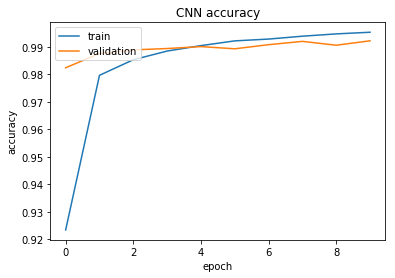


Accuracy with test data = 99.35%

Confusion matrix:



,0,1,2,3,4,5,6,7,8,9
0,977,0,0,0,0,0,1,1,1,0
1,0,1132,0,0,0,1,1,0,0,1
2,1,1,1027,0,0,0,0,2,1,0
3,0,0,0,1006,0,3,0,0,1,0
4,0,0,0,0,977,0,3,0,0,2
5,0,0,0,6,0,885,1,0,0,0
6,3,1,0,0,1,1,952,0,0,0
7,0,3,3,0,0,0,0,1019,1,2
8,1,0,2,1,0,1,0,0,968,1
9,0,0,0,1,6,5,0,2,3,992


In [14]:
# Define tensorflow convolution neural network (CNN)
def cnn():
    model = Sequential() # create model
    # first convolution layer
    model.add(Conv2D(32, (5,5), activation='relu', input_shape=(h, w, 1)))
    model.add(MaxPooling2D(pool_size=(2,2))) # max pooling
    # second convolution layer
    model.add(Conv2D(64, (5,5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2))) # max pooling
    model.add(Dropout(0.2)) # dropout layer
    model.add(Flatten()) # flatten for densely connected layer
    model.add(Dense(256, activation='relu')) # dense layer
    model.add(Dropout(0.2)) # dropout layer
    model.add(Dense(nClasses, activation='softmax')) # softmax layer
    model.compile(loss=categorical_crossentropy,
                  optimizer=Adadelta(),
                  metrics=['accuracy'])
    return model
  
model = cnn()
print(model.summary()) # display model summary
plot_model(model, to_file='cnn.png', show_shapes=True, show_layer_names=True)
Image('cnn.png')
display(Image('cnn.png'))

def Xform(x):
    """function to reshape CNN inputs"""
    return x.reshape(len(x), w, h, 1)/255

st = time.time()
history = model.fit(Xform(X), to_categorical(y_train, nClasses),
                    validation_split=1/6, batch_size=128, epochs=10)
t = time.time() - st
print("Time to train model = %4.2f seconds" %t)
plotHistory("CNN", history, start=0)
predicted = model.predict(Xform(Xt)).argmax(axis=1) # predict test labels 
acc = accuracy_score(y_test, predicted) # accuracy with test data
print("\nAccuracy with test data = %4.2f%%\n" %(acc*100))
result.append(['CNN', acc, t])
print("Confusion matrix:\n")
pd.DataFrame(confusion_matrix(y_test, predicted)) # display confusion matrix

We shall now investigate if an ensemble of 3 CNN models does better than a single model

In [15]:
probs = np.zeros((len(y_test), nClasses))
st = time.time()
for i in range(1,4):
  print("Training CNN model %d" %i)
  model = cnn()
  model.fit(Xform(X), to_categorical(y_train, nClasses),
                    batch_size=128, epochs=10)
  prob = model.predict(Xform(Xt))
  predicted = prob.argmax(axis=1)
  acc = accuracy_score(y_test, predicted) # accuracy with test data
  print("\nAccuracy of CNN model %d with test data = %4.2f%%\n" %(i, acc*100))
  probs += prob
t = time.time() - st
print("\nTime to train ensemble model = %4.2f seconds" %t)
predicted = probs.argmax(axis=1)
acc = accuracy_score(y_test, predicted) # accuracy with test data
print("\nAccuracy of ensemble with test data = %4.2f%%\n" %(acc*100))
result.append(['Ensemble_CNN', acc, t])

Training CNN model 1
Epoch 1/10
60000/60000 [==============================] - 3s 48us/sample - loss: 0.2064 - acc: 0.9349
Epoch 2/10
60000/60000 [==============================] - 3s 44us/sample - loss: 0.0595 - acc: 0.9818
Epoch 3/10
60000/60000 [==============================] - 3s 43us/sample - loss: 0.0422 - acc: 0.9865
Epoch 4/10
60000/60000 [==============================] - 3s 43us/sample - loss: 0.0330 - acc: 0.9899
Epoch 5/10
60000/60000 [==============================] - 3s 43us/sample - loss: 0.0279 - acc: 0.9912
Epoch 6/10
60000/60000 [==============================] - 3s 43us/sample - loss: 0.0233 - acc: 0.9926
Epoch 7/10
60000/60000 [==============================] - 3s 43us/sample - loss: 0.0199 - acc: 0.9937
Epoch 8/10
60000/60000 [==============================] - 3s 43us/sample - loss: 0.0178 - acc: 0.9944
Epoch 9/10
60000/60000 [==============================] - 3s 43us/sample - loss: 0.0163 - acc: 0.9948
Epoch 10/10
60000/60000 [==============================] - 3s

### Display summary of results

In [16]:
pd.DataFrame(result, columns=['model', 'accuracy', 'time'])

,model,accuracy,time
0,Naive Bayes,0.8365,0.400320
1,Decision Tree,0.8790,26.383127
2,Random Forest,0.9680,25.891771
3,ANN,0.9796,50.370026
4,CNN,0.9935,26.360301
5,Ensemble_CNN,0.9943,84.028703


### Display incorectly predicted digits

Number of images incorrecly classified = 57
Labels shown as TRUE => PREDICTED


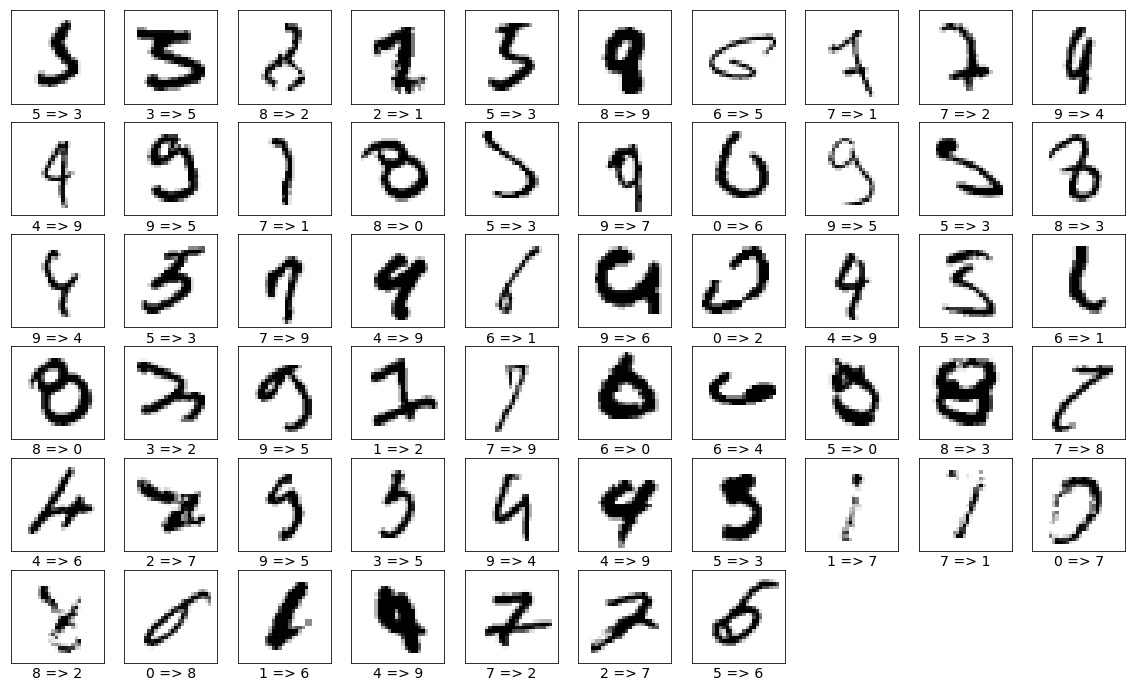

In [17]:
wrong = [i for i,(t,p) in enumerate(zip(y_test, predicted)) if t !=p]
print("Number of images incorrecly classified = %d" %(len(wrong)))
print("Labels shown as TRUE => PREDICTED")
images = x_test[wrong]
labels = [str(t)+' => '+str(p) for t,p in zip(y_test[wrong], predicted[wrong])]
displayDigits(images, labels, 10)

### Predict any example from the test set

Type in the ID of a test image (between 0 and 10000):2019
The image is labeled: 9
The image is predicted as: 9
The image is:


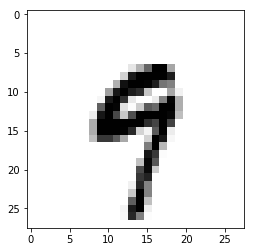

In [18]:
imageID = int(input("Type in the ID of a test image (between 0 and %d):"
                    %len(y_test)))
print("The image is labeled: %d" %y_test[imageID])
print("The image is predicted as: %d" %predicted[imageID])
print("The image is:")
img = x_test[imageID]
plt.imshow(img, interpolation='nearest', cmap='gray_r')
plt.show()
 

### Predict your own hand written digit
Load your own image files first

In [0]:
def predictImage(infile):
  img = PIL.Image.open(infile).convert("L")
  img = img.resize((20,20))
  img = np.array(img)
  img = 255 - img
  a = np.zeros((28,28))
  a[4:4+20,4:4+20] = img
  x = np.array([a])
  p = model.predict(Xform(x)).argmax(axis=1)[0]
  print("Image predicted as %d" %p)
  plt.imshow(a, interpolation='nearest', cmap='gray_r')
  return

Specify name of your image file: sample2.png
Image predicted as 2


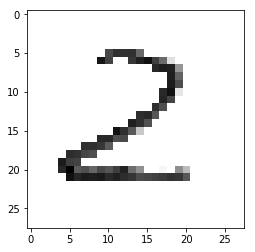

In [26]:
infile = input("Specify name of your image file: ")
predictImage(infile)